# Lab 5: Supervised Learning Algorithm - Decision Tree and Performance Metrics

### 1. Supervised Learning
Supervised Learning is a type of machine learning where the model is trained on a labeled dataset, meaning each input data point is associated with an output label. The goal is to learn a mapping function from inputs to outputs to make predictions on unseen data.

---

### 2. Classification vs. Regression Problems
- **Classification:** Involves predicting discrete categories or class labels (e.g., spam vs. not spam).
- **Regression:** Involves predicting continuous numerical values (e.g., house prices).

---

### 3. Decision Tree
A Decision Tree is a supervised learning algorithm used for both classification and regression tasks. It partitions data into subsets based on feature values, creating a tree-like structure where each node represents a feature, each branch represents a decision rule, and each leaf represents an outcome.

#### Components:
- **Root Node:** Represents the entire dataset and splits it into subsets.
- **Internal Nodes:** Represent tests on features.
- **Leaf Nodes:** Represent class labels or predicted values.

---

### 4. Entropy
Entropy is a measure of impurity or randomness in a dataset. It is used to quantify the uncertainty in a dataset. Higher entropy means more
disorder. It is used in decision trees to decide the best feature for splitting the data.

---

### 5. Information Gain
Information Gain measures the reduction in entropy after a dataset is split based on a feature. It helps determine the feature that best separates the data.

#### $ Entropy = \sum_{i}\;-P_{i}log_{2}P_{i} $    ,
<b> $\;\;\;\;\;\;$ $ where  P_{i} \; is \;  the \; probability\; of\; class \;i$</b>

#### Information Gain = Entropy(Parent) - [average entropy (children)]

---

### 6. Node Selection Based on Information Gain
Decision trees use information gain to select the feature that provides the highest reduction in entropy. The feature with the highest information gain is chosen for splitting at each step.

---

### 7. Overfitting and Underfitting
- **Overfitting:** Occurs when the model learns the noise and details of the training data too well, resulting in poor generalization to new data.
  - Symptoms: High accuracy on training data but low accuracy on test data.
- **Underfitting:** Occurs when the model is too simple to capture the underlying patterns in the data.
  - Symptoms: Poor performance on both training and test data.

---

### Performance Metrics for Decision Trees
- **Accuracy:** Proportion of correctly classified instances.
- **Precision:** Ratio of true positives to the sum of true positives and false positives.
- **Recall:** Ratio of true positives to the sum of true positives and false negatives.
- **F1-Score:** Harmonic mean of precision and recall.
- **Mean Squared Error (MSE):** Used for regression tasks to measure average squared differences between predicted and actual values.

These metrics ensure a comprehensive evaluation of the decision tree's performance across various use cases.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dbts_new = pd.read_csv('C:/Users/yakuma/Desktop/Newfolder/college assignments/7th sem assignments/data warehousing/DbDW lab/imputed_data_diabetes1.csv')
dbts_new.head()

,Unnamed: 0,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,Diabetic
0,0,1,85.0,66.0,29.000000,125.0,26.6,0.351,31,0
1,1,8,183.0,64.0,29.142593,125.0,23.3,0.672,32,1
2,2,1,89.0,66.0,23.000000,94.0,28.1,0.167,21,0
3,3,0,137.0,40.0,35.000000,168.0,43.1,2.288,33,1
4,4,5,116.0,74.0,29.142593,125.0,25.6,0.201,30,0


In [7]:
from sklearn.model_selection import train_test_split
spltd_data = dbts_new.values
# separate the dataset into input and output components
X = dbts_new.iloc[:, :-1].values 
Y = dbts_new.iloc[:, -1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

### Now, lets apply the cleaned data into one of the learning algorithm called Decision Tree using sklearn library.

In [9]:
from sklearn.tree import DecisionTreeClassifier
algo = DecisionTreeClassifier(criterion = "entropy",random_state = 42, max_depth = 4 , min_samples_leaf=5)  # decision tree witha depth of 4
algo.fit(X_train, Y_train)
result = algo.score(X_test, Y_test)
print(("The Decision Tree model has given Accuracy of: %.3f%%") % (result*100.0))

The Decision Tree model has given Accuracy of: 76.623%


### Decision Tree Plot

[Text(0.3875, 0.9, 'x[2] <= 123.5\nentropy = 0.927\nsamples = 613\nvalue = [403.0, 210.0]'),
 Text(0.15, 0.7, 'x[6] <= 26.45\nentropy = 0.688\nsamples = 359\nvalue = [293, 66]'),
 Text(0.26875, 0.8, 'True  '),
 Text(0.1, 0.5, 'entropy = 0.0\nsamples = 92\nvalue = [92, 0]'),
 Text(0.2, 0.5, 'x[8] <= 28.5\nentropy = 0.807\nsamples = 267\nvalue = [201, 66]'),
 Text(0.1, 0.3, 'x[4] <= 29.071\nentropy = 0.556\nsamples = 139\nvalue = [121, 18]'),
 Text(0.05, 0.1, 'entropy = 0.214\nsamples = 59\nvalue = [57, 2]'),
 Text(0.15, 0.1, 'entropy = 0.722\nsamples = 80\nvalue = [64, 16]'),
 Text(0.3, 0.3, 'x[5] <= 88.0\nentropy = 0.954\nsamples = 128\nvalue = [80, 48]'),
 Text(0.25, 0.1, 'entropy = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.35, 0.1, 'entropy = 0.988\nsamples = 110\nvalue = [62.0, 48.0]'),
 Text(0.625, 0.7, 'x[6] <= 29.95\nentropy = 0.987\nsamples = 254\nvalue = [110, 144]'),
 Text(0.50625, 0.8, '  False'),
 Text(0.45, 0.5, 'x[1] <= 1.5\nentropy = 0.866\nsamples = 73\nvalue = [52, 

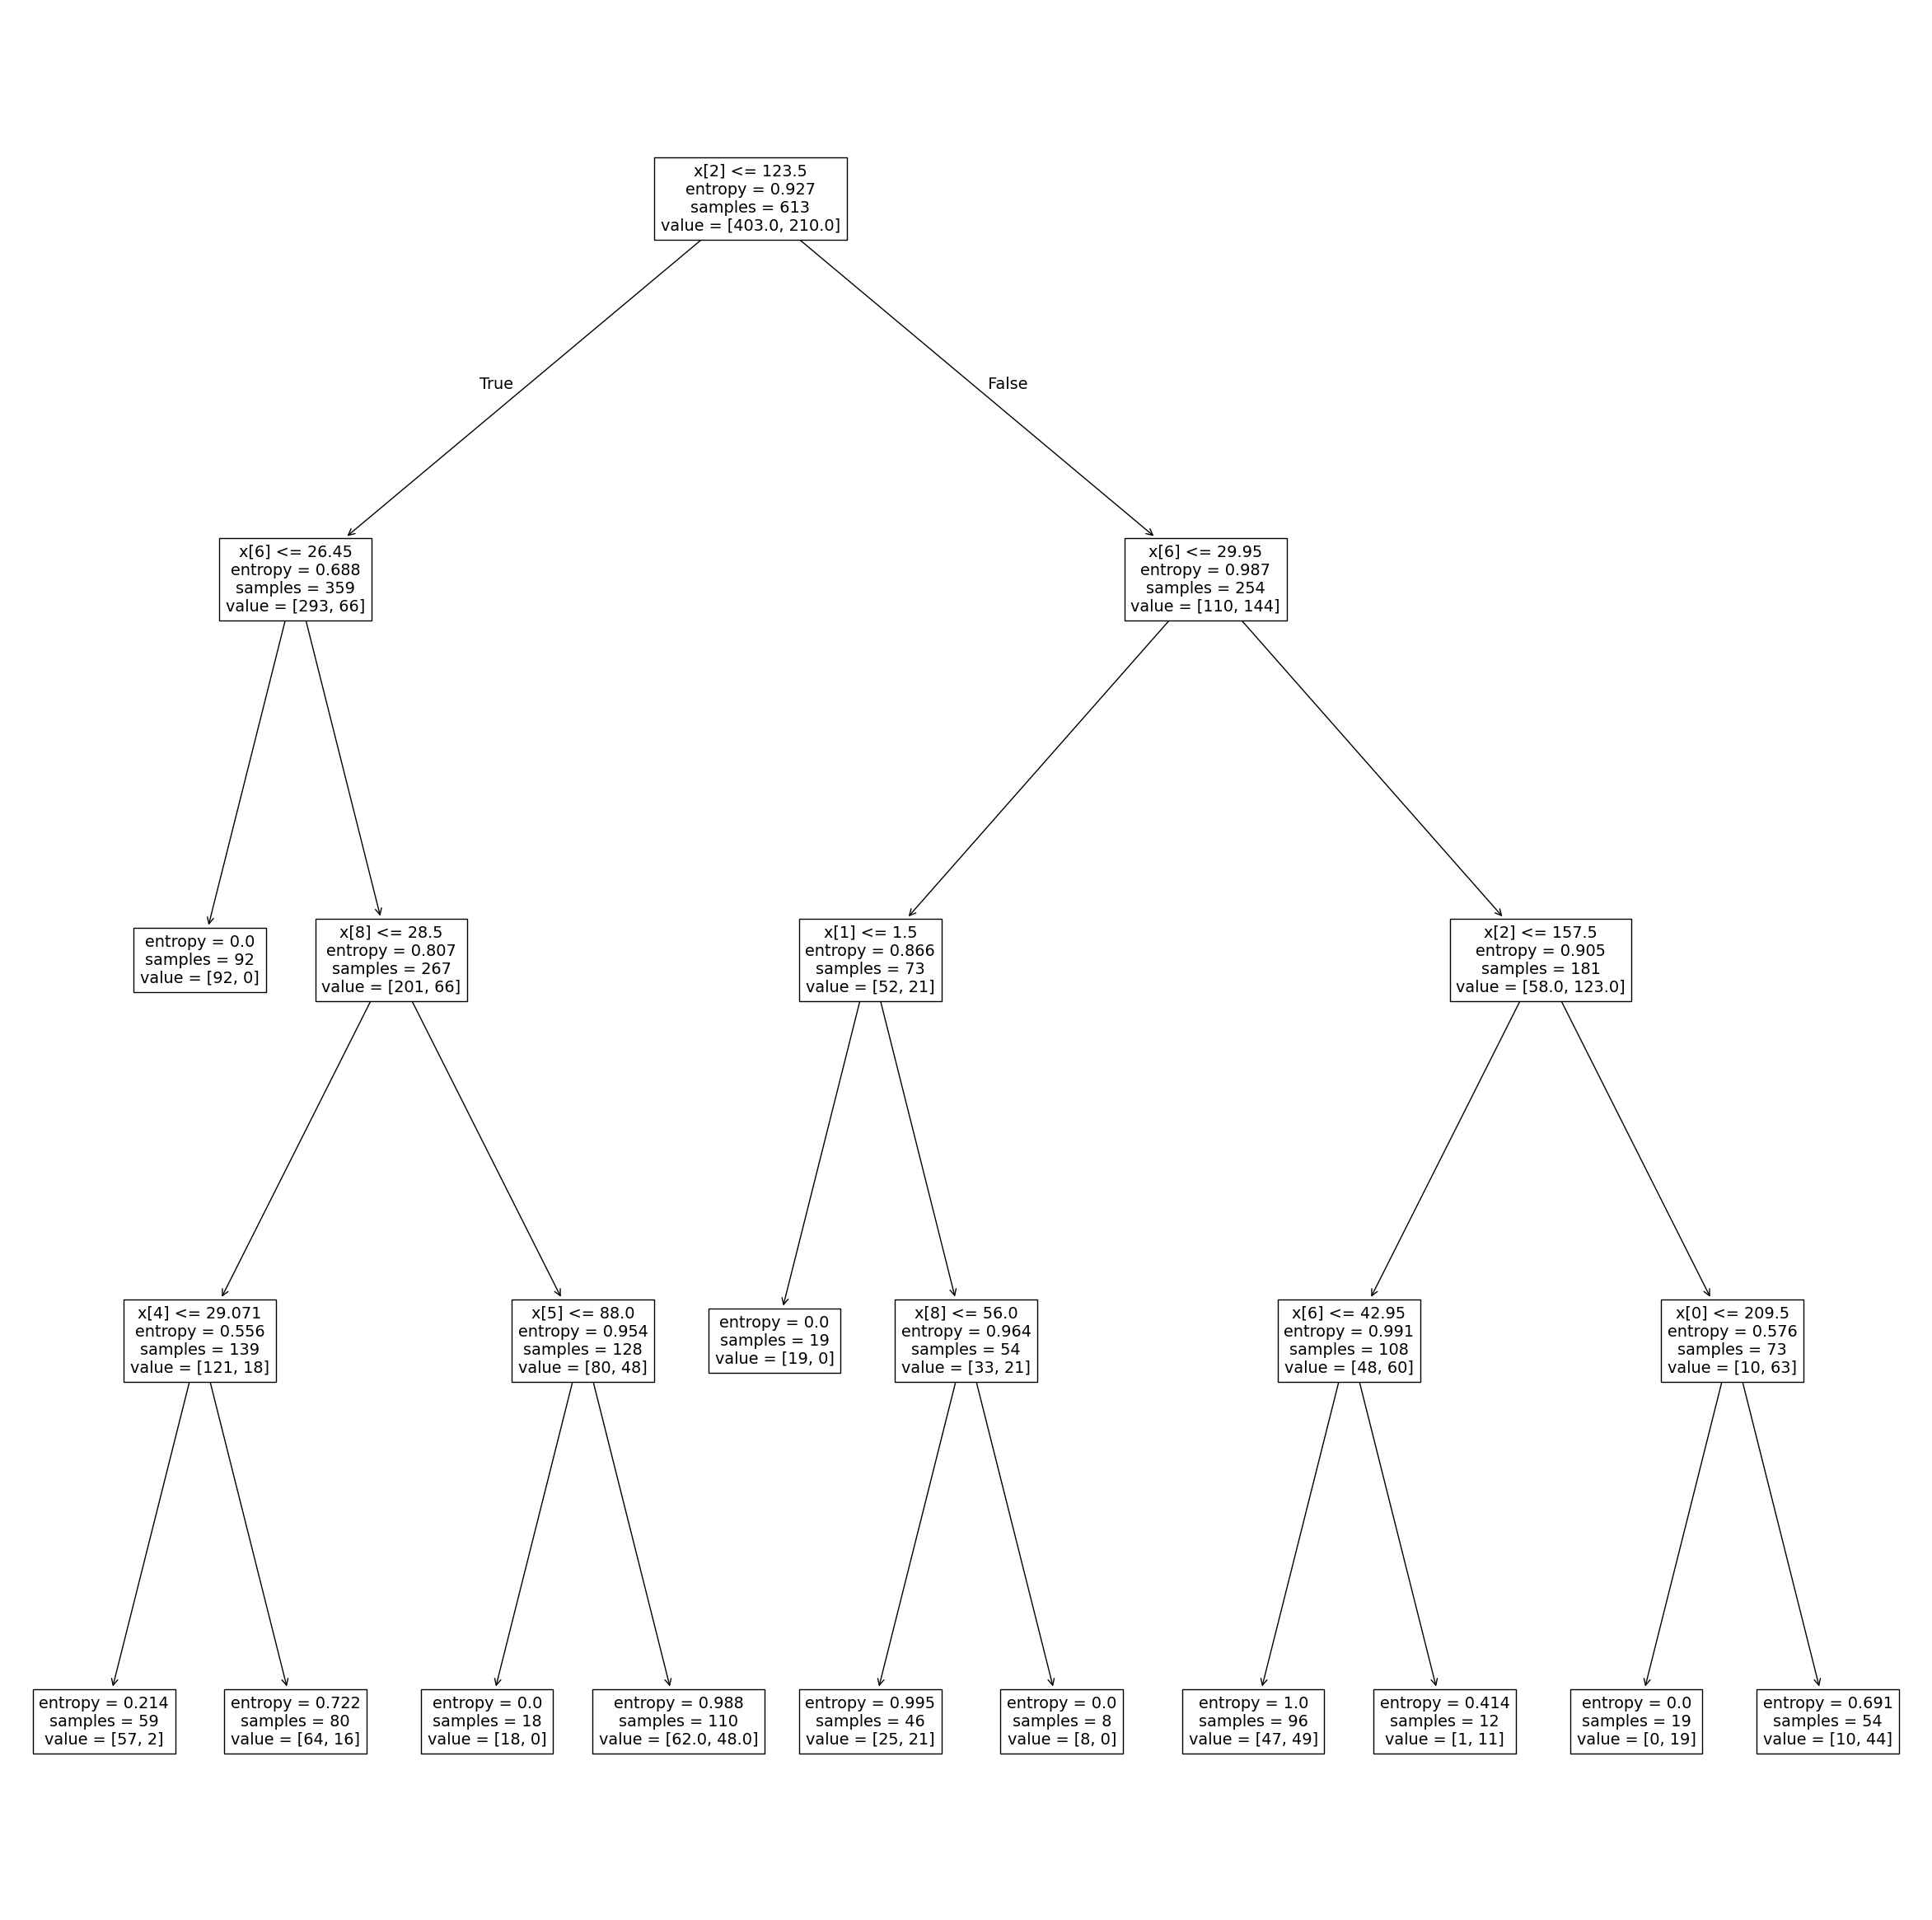

In [10]:
from sklearn import tree
plt.figure(figsize=(30,30))
tree.plot_tree(algo)

### Performance Metrics of learning algorithm

Evaluate the predictive accuracy of a model


#### Create Confusion Matrix to compare the number of predicted values against actual labeled value

In [11]:
Y_Prdct = algo.predict(X_test)
print(Y_Prdct)

[1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0
 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1
 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 1 0 1 0]


In [13]:
from sklearn import metrics
cf_mtrx = metrics.confusion_matrix(Y_test, Y_Prdct)
print("Confusion Matrix:\n", cf_mtrx)
print("Shape of Confusion Matrix:", cf_mtrx.shape)

Confusion Matrix:
 [[83 14]
 [22 35]]
Shape of Confusion Matrix: (2, 2)


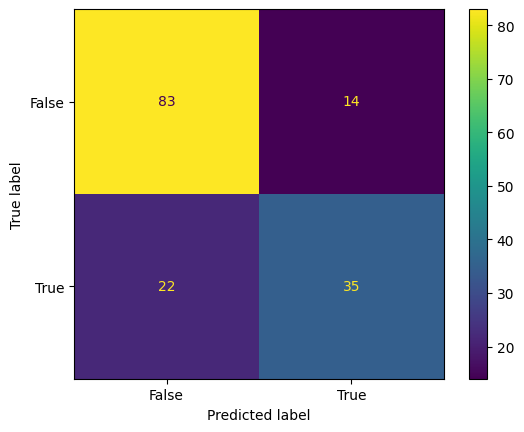

In [14]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_mtrx, display_labels = [ False,True]) #[False, True])
cm_display.plot()
plt.show()

### Data Interpretation of Confusion Matrix

<b>True negative (TN) and positive (TP):</b> Out of the total test dataset the decision tree model predicted 83 data rows as true negative and 35 data rows as true postive which means the actual labels matched the predicted labelsfor real diabetic and no diabetic labels.

<b>False Positive:</b> Actually the sample Daibetic label is false/non-diabetic but the model predicts the sample as true or diabetic. So for the 14 non diabetic samples the model predicted all of them as diabetic which isnt the case.

<b>False Negative:</b> Actually the sample Daibetic label is true/diabetic but the model predicts the sample as fasle or non- diabetic. So for the 22 diabetic samples the model predicted all of them as non-diabetic which isn't the case.

#### Accuracy= Number of correctly classified objects / Number of classified objects

- $ Accuracy  =   (TP + TN)\; /\; (TP + TN + FP +  FN)$

#### Evaluate separately for each class C

- $ Precision (p)= (TP )\; /\; (TP + FP)$

- $ Recall (r) = (TP )\; /\; (TP + FN)$

#### Maximize
- $ F-measure (F) =  2rp \;/ \;(r+p)$

In [15]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_Prdct))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        97
           1       0.71      0.61      0.66        57

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154

